## Homework Assignment 3
### Name: Prasad Akmar
### LE10772

In [228]:
import pandas as pd
import os
import numpy as np

## Loading the data:
#### First of all, Loading the given mnist data and labels into local data structures.
I am using arrays to store the data and the labels

In [229]:
mnist_data = np.loadtxt(fname = "https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_data.txt", dtype = np.int)

In [230]:
mnist_labels = np.loadtxt(fname = "https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_labels.txt",dtype = np.int)

In [231]:
mnist_data.shape

(10000, 784)

In [232]:
mnist_labels.shape

(10000,)

## Converting labels:
#### The problem given is a binary problem. We just have to find out if the given number is 8 or not.
So converting the label data into 0s and 1s. i.e. if given number is 8, the label is 1 otherwise 0. This converted data now can be used in the binary classification problem

In [304]:
for n, i in enumerate(mnist_labels):
    if i == 8:
        mnist_labels[n] = 1
    else:
        mnist_labels[n] = 0

In [321]:
def sigmoid(mnist_data,weights):
    scores = np.dot(mnist_data,weights)
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(mnist_data,mnist_labels,num_steps,learning_rate):
    
    weights = np.zeros(mnist_data.shape[1])
    gradient = np.zeros(mnist_data.shape[1]) 
    for step in range(num_steps):
        predictions = sigmoid(mnist_data,weights)

        # Update weights with gradient
        output_error_signal = mnist_labels - predictions
        #for j in range(1,10000):
        gradient += np.dot(mnist_data.T, output_error_signal)

        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        #if step % 100 == 0:
        #    print(log_likelihood(mnist_data, mnist_labels, weights))
        
    return weights

In [348]:
def logistic_reg(mnist_data,mnist_labels,num_steps,learning_rate):
    weights = np.zeros(mnist_data.shape[1])
    for step in range(num_steps):
        gradient = np.zeros(mnist_data.shape[1])
        for i in (1,10000):
            predictions = sigmoid(mnist_data,weights)
            error = mnist_labels - predictions
            for j in (1,784):
                gradient += np.dot(mnist_data.T, error)
        weights += learning_rate * gradient
    return weights

In [349]:
weights = logistic_reg(mnist_data,mnist_labels,1000,1e-5)

In [350]:
weights;

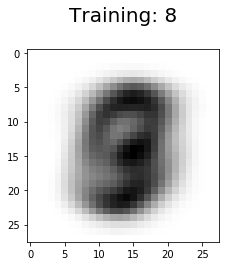

In [351]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(weights, [8])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(weights,(28,28)),cmap = plt.cm.gist_gray)
    plt.title('Training: %i\n' % label, fontsize = 20)